In [4]:
## Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import networkx as nx

## Import raw data
df = pd.read_csv('Data/drug_use.tsv',delimiter='\t',encoding='utf-8')

## Selecting columns of interest
drug = df[['CGRYR','SMKYR', 'CIGYR', 'MRJYR', 'ALCYR', 'COCYR','CRKYR', 'HERYR',
          'LSDYR', 'PCPYR', 'ECSYR', 'INHYR', 'ANLYR', 'TRQYR', 'STMYR']].copy()

In [5]:
## Recording usage rate (column mean) and correlation matrix
mean = drug.mean()

corr = drug.corr()





c:\users\garre\dev\404proj\404projenv\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


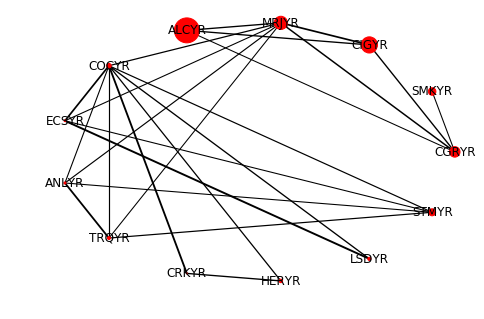

In [6]:
# Formatting edgelist
links = corr.stack().reset_index()
links.columns =  ['from', 'to', 'value']
links = links.loc[(links['value'] > 0.2) & (links['from'] != links['to'])]
links_a = links.values



# Building Graph
G = nx.Graph()
G.add_weighted_edges_from(links_a)
pos = nx.circular_layout(G)
edges = G.edges()
edge_weights = [G[u][v]['weight'] for u,v in edges]
for x in range(len(edge_weights)):
    edge_weights[x] *= 5



# Drawing Graph
nx.draw(G, pos, 
        edges = edges,
        width = edge_weights,
        with_labels = True,
        node_size=[v * 1000 for v in mean.values])


## Graph explanation:

This overall view of the network model shows usage rates of certain drugs as shown by size of the node.
Connecting the nodes is the correlation between usage of different drugs in the past year, with 
higher correlation being signified by thicker lines.

SNFYR = Used Snuff in past year? 1 = Yes, 0 = No
CGRYR = Used Cigars in past year? 1 = Yes, 0 = No
SMKYR = Used Smokeless tobacco in past year? 1 = Yes, 0 = No
CIGYR = Used Cigarettes in past year? 1 = Yes, 0 = No
MRJYR = Used Marijuana in past year? 1 = Yes, 0 = No
ALCYR = Used Alcohol in past year? 1 = Yes, 0 = No
COCYR = Used Cocaine in past year? 1 = Yes, 0 = No
CRKYR = Used Crack in past year? 1 = Yes, 0 = No
HERYR = Used Heroin in past year? 1 = Yes, 0 = No
HALYR = Used Hallucinogen in past year? 1 = Yes, 0 = No
LSDYR = Used LSD in past year? 1 = Yes, 0 = No
PCPYR = Used PCP in past year? 1 = Yes, 0 = No
ECSYR = Used ECS in past year? 1 = Yes, 0 = No
INHYR = Used Inhalant in past year? 1 = Yes, 0 = No
ANLYR = Used pain relievers (non-medically) in past year? 1 = Yes, 0 = No
TRQYR = Used tranquilizers in past year? 1 = Yes, 0 = No
STMYR = Used stimulant in past year? 1 = Yes, 0 = No
MTHYR = Used methanphetamine in past year? 1 = Yes, 0 = No

## Results:

As known from before, alcohol is the drug with highest reported usage, followed by marijuana and cigarettes.

There is clearly clustering of the legal drugs (tobacco and alcohol) as well as the pseudo-legal (marijuana.
Similarly there is clustering  of the illicit drugs, notably: cocaine, ecstasy, and LSD.

Marijuana is the single connection point between the legal drug users and the illicit drug users.
This is only to say that consumers of alcohol and tobacco are also likely to use marijuana, while the same
is true for users of cocaine, ecstasy, and pain relievers.

## Next Step:

Better distinguish stronger relationships with the thinkness variation, as it can be hard to tell at the moment.

Research marijuana to greater length, under more filtered circumstances to see if it consistently the connection
point between legal and illicit drug users.

Create data outputs that are relevant to the chart, as well as generally update the graph output to be more
asthetically pleasing

Research filtering and look at relationships from a more comparative perspective.

Change graph labels to the name of the the drugs to be more legible.

Speed up the data importation process.